# Ejercicio de machine learning: regresión vinícola

En este ejercicio (mucho menos guiado que los anteriores) vas a tener dos objetivos. Para ello, utilizarás un dataset sobre distintos vinos con sus características (como pueden ser la acidez, densidad...). Tendrás que generar, entrenar, validar y testear modelos tanto de clasificación como de regresión.

El dataset proviene de la Universdad de Minho, generado por [P. Cortez](http://www3.dsi.uminho.pt/pcortez/Home.html) et al. Dicho dataset se encuentra en el [*UC Irvine Machine Learning Repository*](https://archive.ics.uci.edu/ml/index.html) ([aquí](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) está disponible; pero debes usar la versión adjunta en la misma carpeta que este documento). Adjunto la descripción del dataset:

```
Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None
```

Además de las 12 variables descritas, el dataset que utilizarás tiene otra: si el vino es blanco o rojo. Dicho esto, los objetivos son:

1. Separar el dataset en training (+ validación si no vas a hacer validación cruzada) y testing, haciendo antes (o después) las transformaciones de los datos que consideres oportunas, así como selección de variables, reducción de dimensionalidad... Puede que decidas usar los datos tal cual vienen también...
2. Hacer un modelo capaz de clasificar lo mejor posible si un vino es blanco o rojo a partir del resto de variables (vas a ver que está chupado conseguir un muy buen resultado).
3. Hacer un modelo regresor que prediga lo mejor posible la calidad de los vinos.

El fichero csv a utilizar `winequality.csv` tiene las cabeceras de cuál es cada variable, y los datos están separados por punto y coma.

Siéntete libre de hacer todo el análisis exploratorio y estadístico (así como gráficos) que quieras antes de lanzarte a hacer modelos.

Y nada más. ¡Ánimo!

# EJERCICIO PRÁCTICO DE REGRESIÓN

## 1. CARGA DE DATOS

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option("display.max_rows", 500) 
plt.style.use("ggplot")

In [5]:
df = pd.read_csv('winequality.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,red
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,white
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,white
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,red
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,white


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


## 2. ANÁLISIS EXPLORATORIO

### Valores nulos

In [7]:
null_values = df.isnull().sum()
print(null_values[null_values > 0])

Series([], dtype: int64)


### Resumen estadístico

In [8]:
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


Al analizar estadísticamente las variables de nuestro dataset de vinos, observamos que la mayoría de las características presentan una distribución razonablemente simétrica en torno a sus respectivas medias. Por ejemplo, la acidez fija (fixed acidity) tiene una media de 7.22 y una desviación estándar de 1.30, lo que indica una dispersión moderada alrededor de la media.   

La acidez volátil (volatile acidity), por otro lado, muestra una distribución con una media de 0.34 y una desviación estándar de 0.16, sugiriendo una menor variabilidad en comparación con la acidez fija.  

Además, al observar los cuantiles, vemos que la mayoría de las variables presentan una concentración de valores alrededor de los percentiles 25 y 75, con algunos valores extremos que se encuentran en los percentiles máximos y mínimos. Por ejemplo, la variable residual sugar muestra un rango intercuartílico significativo, con un mínimo de 0.60 y un máximo de 65.80, lo que sugiere la presencia de algunos valores atípicos que pueden requerir una atención especial durante el análisis."

### Gráficos con las distribuciones de las variables numéricas

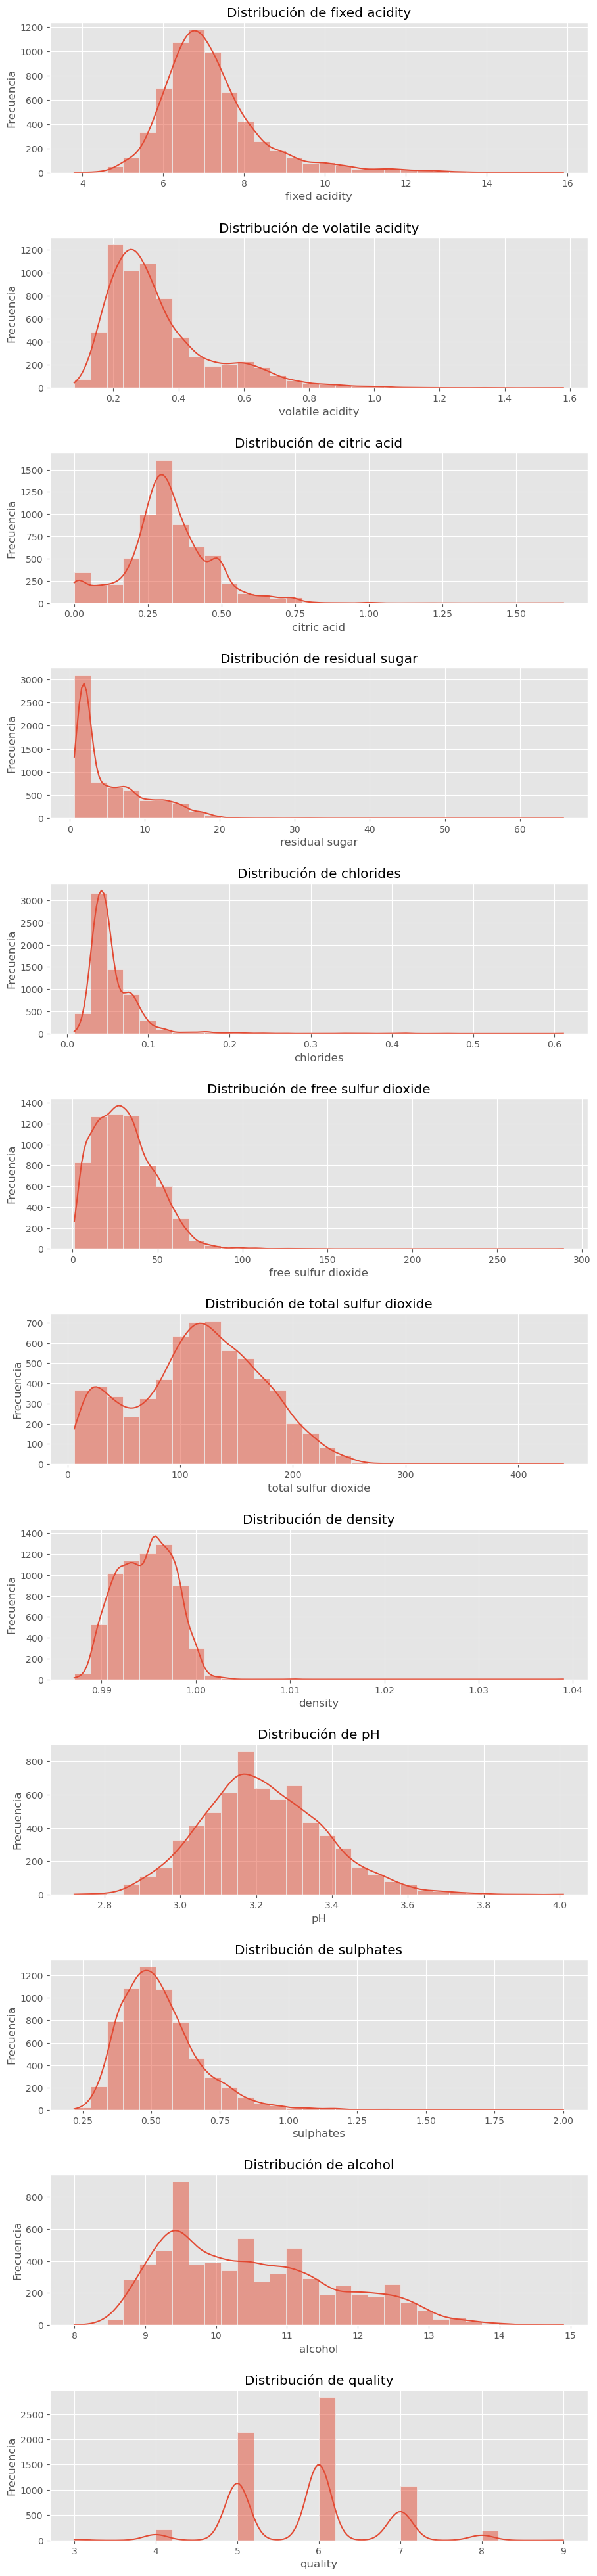

In [119]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns = [col for col in numeric_columns if col != 'color']
# Crear gráficos para cada variable numérica
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 40))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.show()

### Gráfico de la distribución de frecuencias de variable calidad

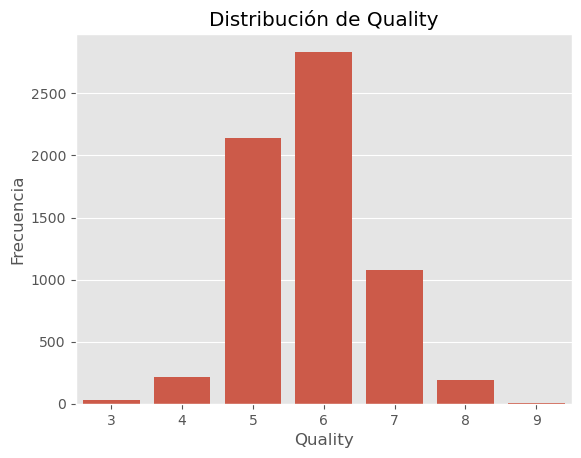

In [120]:
sns.countplot(x=df['quality'])
plt.title('Distribución de Quality')
plt.xlabel('Quality')
plt.ylabel('Frecuencia')
plt.show()

La variable objetivo o dependiente puede tomar valores entre tres y nueve. Esta muy desbalanceada, es decir, la mayoria de los vinos tienen una calidad normal, habiendo muy pocos vinos con mala o excelente calidad

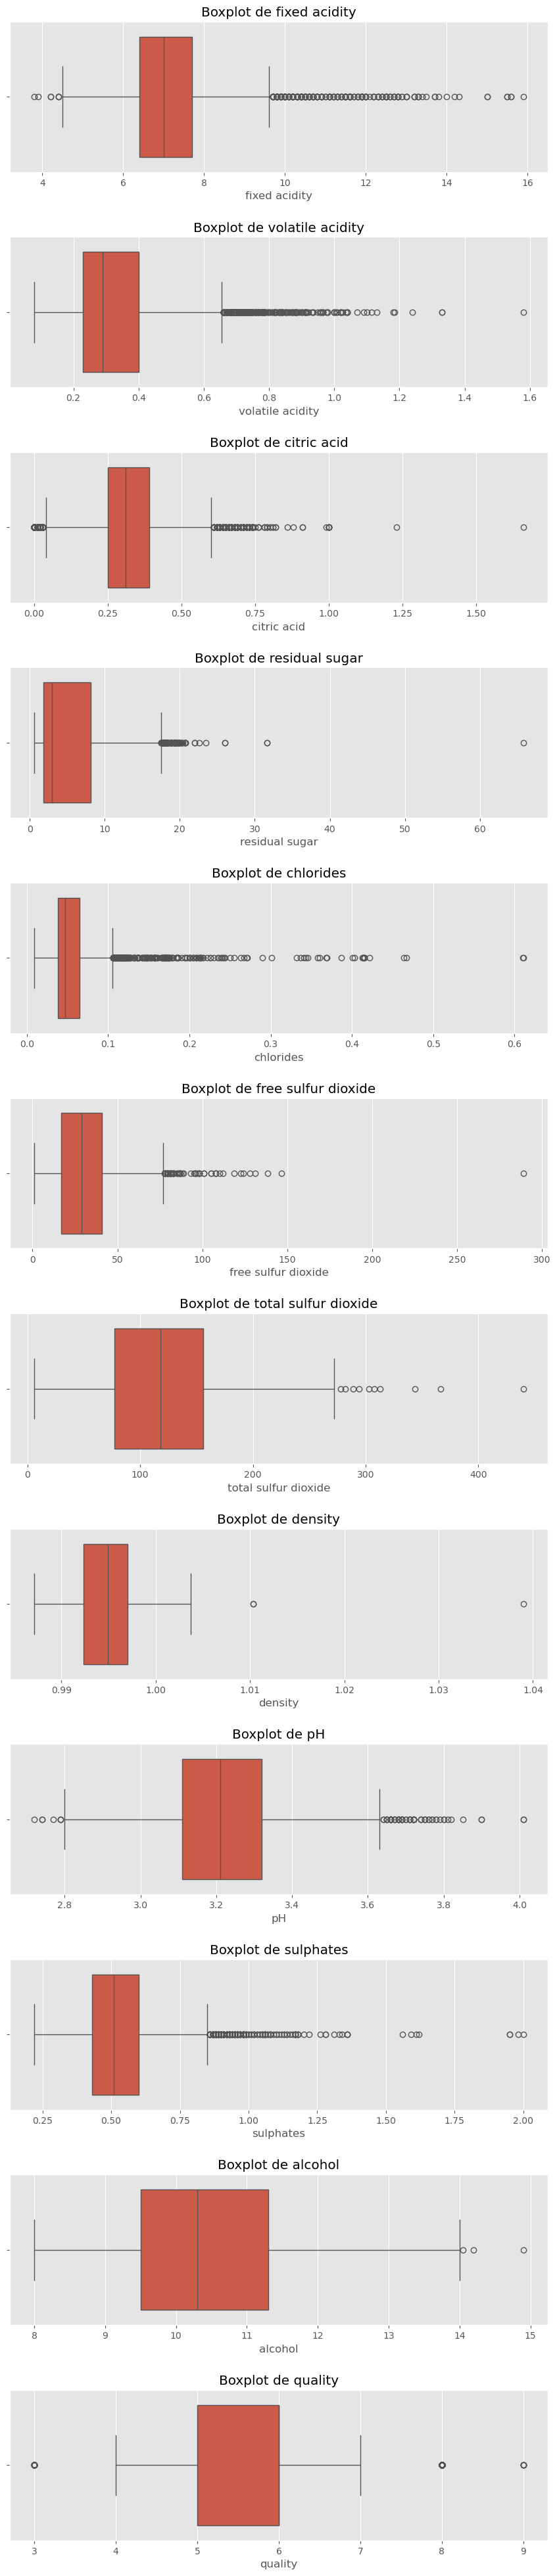

In [121]:
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 40))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel(col)

plt.show()

### Matriz de correlación

In [124]:
df_numerico = df.select_dtypes(include=[int, float])

matriz_correlacion = df_numerico.corr()
matriz_correlacion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


### Heatmap 

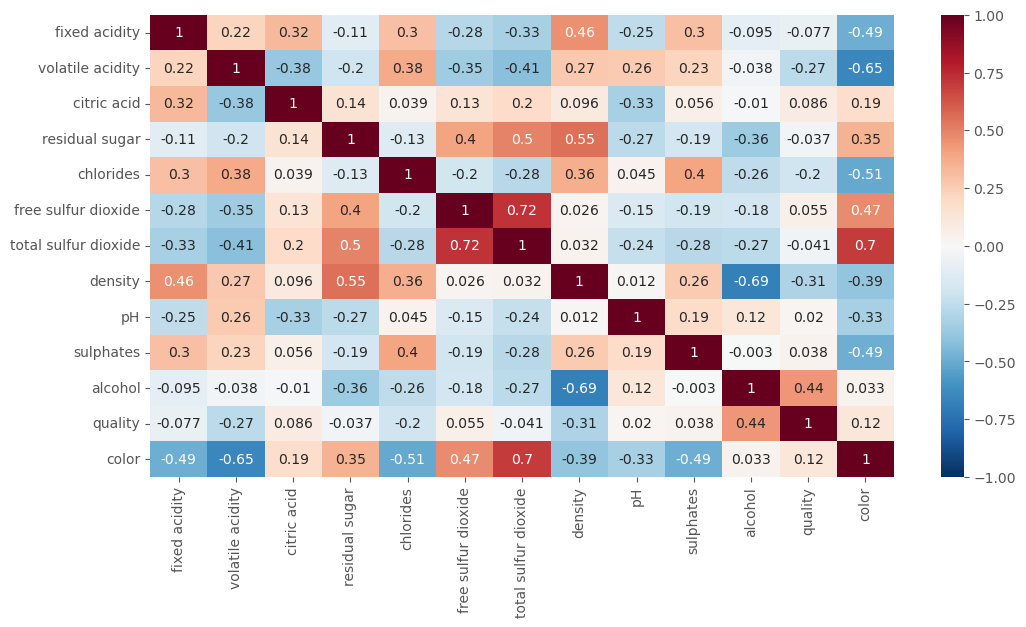

In [125]:
plt.figure(figsize=(12,6))
sns.heatmap(matriz_correlacion, 
            vmin=-1.0,
            vmax=1.0,
            center=0.0,
            annot=True,                     
            cmap="RdBu_r") 
plt.show()

**Correlación fuerte** (0.6<x<0.8)
- total sulfur dioxide vs free sulfur dioxide
- alcohol vs density

**Correlación moderada** (0.5<x<0.6)
- total sulfur dioxide vs residual sugar
- density vs residual sugar
- free sulfur dioxide vs residual sugar

Es importante destacar, ya que nuestra variable objetivo es la calidad del vino, que a medida que aumenta el contenido de alcohol, la calidad del vino tiende a mejorar.  
Existe una correlación negativa significativa entre la densidad y el alcohol, cosa que es totalmente lógica ya que ya sabíamos con anterioridad, y es que que medida que aumenta el contenido de alcohol en el vino, la densidad disminuye.  

## 3. SEPARACIÓN DE LOS DATOS EN TRAIN Y TEST

### Codificamos la varible categórica color

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df["color"])
df["color"] = label_encoder.transform(df["color"])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,5.20,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0
1,6.20,0.55,0.45,12.0,0.049,27.0,186.0,0.99740,3.17,0.50,9.3,6,1
2,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6,1
3,6.70,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,5,0
4,7.60,0.23,0.34,1.6,0.043,24.0,129.0,0.99305,3.12,0.70,10.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.40,0.18,0.30,10.4,0.045,44.0,174.0,0.99660,3.11,0.57,9.7,6,1
6493,6.20,0.27,0.49,1.4,0.050,20.0,74.0,0.99310,3.32,0.44,9.8,6,1
6494,6.90,0.13,0.28,13.3,0.050,47.0,132.0,0.99655,3.34,0.42,10.1,6,1
6495,7.00,0.24,0.36,4.9,0.083,10.0,133.0,0.99420,3.33,0.37,10.8,6,1


### Separamos los datos en train y test

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,
                               train_size=0.8,
                               test_size=0.2,
                               random_state=42)

In [11]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1916,6.8,0.21,0.31,2.9,0.046,40.0,121.0,0.99130,3.07,0.65,10.9,7,1
947,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.99170,3.12,0.53,11.3,6,1
877,7.4,0.36,0.29,2.6,0.087,26.0,72.0,0.99645,3.39,0.68,11.0,5,0
2927,6.5,0.29,0.52,7.9,0.049,35.0,192.0,0.99551,3.16,0.51,9.5,6,1
6063,7.1,0.21,0.40,1.2,0.069,24.0,156.0,0.99280,3.42,0.43,10.6,6,1


In [12]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
3103,7.6,0.20,0.34,1.8,0.041,42.0,148.0,0.99335,3.35,0.66,11.1,6,1
1419,6.7,0.13,0.45,4.2,0.043,52.0,131.0,0.99162,3.06,0.54,11.3,6,1
4761,6.4,0.31,0.40,6.4,0.039,39.0,191.0,0.99513,3.14,0.52,9.8,5,1
4690,5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.99240,3.46,0.87,12.9,7,0
4032,6.7,0.31,0.42,6.4,0.057,25.0,148.0,0.99550,3.16,0.45,9.6,5,1


### Reseteamos índices

In [13]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [14]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,6.8,0.21,0.31,2.9,0.046,40.0,121.0,0.99130,3.07,0.65,10.9,7,1
1,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.99170,3.12,0.53,11.3,6,1
2,7.4,0.36,0.29,2.6,0.087,26.0,72.0,0.99645,3.39,0.68,11.0,5,0
3,6.5,0.29,0.52,7.9,0.049,35.0,192.0,0.99551,3.16,0.51,9.5,6,1
4,7.1,0.21,0.40,1.2,0.069,24.0,156.0,0.99280,3.42,0.43,10.6,6,1


### Separamos las variables independientes y la dependiente del train y test

In [15]:
x_train = train.drop(columns=['quality']) # TRAIN, VARIABLES INDEPENDIENTES
x_test = test.drop(columns=['quality']) # TEST VARIABLES INDEPENDIENTES
y_train=train["quality"] #TRAIN, VARIABLE DEPENDIENTE
y_test=test["quality"] #TEST, VARIABLE DEPENDIENTE

In [16]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,6.8,0.21,0.31,2.9,0.046,40.0,121.0,0.99130,3.07,0.65,10.9,1
1,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.99170,3.12,0.53,11.3,1
2,7.4,0.36,0.29,2.6,0.087,26.0,72.0,0.99645,3.39,0.68,11.0,0
3,6.5,0.29,0.52,7.9,0.049,35.0,192.0,0.99551,3.16,0.51,9.5,1
4,7.1,0.21,0.40,1.2,0.069,24.0,156.0,0.99280,3.42,0.43,10.6,1


In [17]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,7.6,0.20,0.34,1.8,0.041,42.0,148.0,0.99335,3.35,0.66,11.1,1
1,6.7,0.13,0.45,4.2,0.043,52.0,131.0,0.99162,3.06,0.54,11.3,1
2,6.4,0.31,0.40,6.4,0.039,39.0,191.0,0.99513,3.14,0.52,9.8,1
3,5.1,0.51,0.18,2.1,0.042,16.0,101.0,0.99240,3.46,0.87,12.9,0
4,6.7,0.31,0.42,6.4,0.057,25.0,148.0,0.99550,3.16,0.45,9.6,1


In [18]:
y_train

0       7
1       6
2       5
3       6
4       6
       ..
5192    6
5193    6
5194    5
5195    5
5196    5
Name: quality, Length: 5197, dtype: int64

In [19]:
y_test

0       6
1       6
2       5
3       7
4       5
       ..
1295    5
1296    5
1297    7
1298    6
1299    6
Name: quality, Length: 1300, dtype: int64

### Estandarizamos las features, de forma que todas acaben teniendo media 0 y desviación típica 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Solo queremos estandarizar las features y dentro de estas, solo queremos estandarizar las variables numéricas, por tanto, la feature "Color" tenemos que separarla antes de aplicar Standard Scaler

In [23]:
numeric_features_train = x_train.drop("color",axis=1)
categorical_features_train = x_train["color"]

In [27]:
numeric_features_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.8,0.21,0.31,2.9,0.046,40.0,121.0,0.99130,3.07,0.65,10.9
1,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.99170,3.12,0.53,11.3
2,7.4,0.36,0.29,2.6,0.087,26.0,72.0,0.99645,3.39,0.68,11.0
3,6.5,0.29,0.52,7.9,0.049,35.0,192.0,0.99551,3.16,0.51,9.5
4,7.1,0.21,0.40,1.2,0.069,24.0,156.0,0.99280,3.42,0.43,10.6
...,...,...,...,...,...,...,...,...,...,...,...
5192,7.0,0.14,0.41,0.9,0.037,22.0,95.0,0.99140,3.25,0.43,10.9
5193,8.4,0.32,0.35,11.7,0.029,3.0,46.0,0.99439,3.02,0.34,11.8
5194,6.9,0.30,0.21,7.2,0.045,54.0,190.0,0.99595,3.22,0.48,9.4
5195,7.1,0.31,0.25,11.2,0.048,32.0,136.0,0.99663,3.14,0.40,9.5


In [29]:
scaler.fit(numeric_features_train)

StandardScaler()

Creamos un dataframe que contenga las features numéricas estandarizadas y añadimos la feature "color" sin estandarizar a nuestro dataframe. De este modo, hemos creado nuestro dataframe con los datos de train escalados

In [30]:
numeric_features_esc= scaler.transform(numeric_features_train)
x_train_esc= pd.DataFrame(numeric_features_esc,columns=numeric_features_train.columns)
x_train_esc["color"] = categorical_features_train.reset_index(drop=True)
x_train_esc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,-0.317563,-0.786407,-0.064970,-0.527254,-0.287014,0.532026,0.100542,-1.118691,-0.908271,0.811944,0.338618,1
1,0.143242,-0.002286,0.687037,-0.905908,-0.654831,-0.755008,0.985023,-0.986269,-0.600640,0.001689,0.672861,1
2,0.143242,0.118348,-0.201699,-0.590363,0.873025,-0.251386,-0.766250,0.586242,1.060565,1.014508,0.422179,0
3,-0.547966,-0.303871,1.370679,0.524562,-0.202133,0.252236,1.356505,0.275050,-0.354536,-0.133354,-0.831232,1
4,-0.087160,-0.786407,0.550308,-0.884871,0.363739,-0.363302,0.719679,-0.622109,1.245143,-0.673524,0.087936,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5192,-0.163961,-1.208626,0.618672,-0.947980,-0.541657,-0.475218,-0.359388,-1.085586,0.199199,-0.673524,0.338618,1
5193,0.911252,-0.122920,0.208487,1.323942,-0.768006,-1.538420,-1.226180,-0.095731,-1.215901,-1.281215,1.090665,1
5194,-0.240762,-0.243554,-0.748613,0.377308,-0.315308,1.315439,1.321126,0.420714,0.014621,-0.335917,-0.914793,1
5195,-0.087160,-0.183237,-0.475156,1.218761,-0.230427,0.084362,0.365886,0.645832,-0.477588,-0.876087,-0.831232,1


Hacemos exactamente lo mismo para el test

In [ ]:
numeric_features_test = x_test.drop("color", axis=1)
numeric_features_test_esc = scaler.transform(numeric_features_test)
x_test_esc = pd.DataFrame(numeric_features_test_esc, columns=numeric_features_test.columns)
x_test_esc["color"] = x_test["color"].reset_index(drop=True)
x_test_esc

## 4. PRIMER MODELO: RANDOM FOREST REGRESSOR
Hemos decidido empezar con este modelo con el objetivo de extraer la importancia de las carácteristicas. Random Forest es un algoritmo de aprendizaje en conjunto que combina múltiples árboles de decisión y proporciona una medida de la importancia de las características al evaluar cómo cada característica contribuye a reducir la impureza en los árboles de decisión individuales. Esta medida de importancia se puede utilizar para identificar las características más relevantes para predecir la variable objetivo.

In [35]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [38]:
rf = RFR(n_estimators=100, random_state=42)
rf.fit(x_train_esc, y_train)

RandomForestRegressor(random_state=42)

In [40]:
y_pred = rf.predict(x_test_esc)
y_pred

array([6.45, 6.55, 5.61, ..., 6.28, 5.89, 6.34])

In [128]:
accuracy_before= rf.score(x_test_esc,y_test)
print(f'Accuracy before feature selection: {accuracy_before}')

Accuracy before feature selection: 0.5489633277439387


In [71]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

In [84]:
def metricas(modelo,X,y):
  y_pred=modelo.predict(X)
  salida={}
  salida["r2"]=r2(y_true=y,y_pred=y_pred)
  salida["rmse"]=np.sqrt(mse(y_true=y,y_pred=y_pred))
  salida["mae"]=mae(y_true=y,y_pred=y_pred)
  return salida

In [85]:
metricas(rf,x_train_esc,y_train)

{'r2': 0.9314396100887852,
 'rmse': 0.2272637600344057,
 'mae': 0.16047912257071384}

In [129]:
metricas(rf,x_test_esc,y_test)

{'r2': 0.5489633277439387,
 'rmse': 0.6002853808494244,
 'mae': 0.4251615384615385}

In [87]:
# Extraer la importancia de las características
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
indices

array([10,  1,  5,  9,  3,  8,  6,  4,  2,  7,  0, 11], dtype=int64)

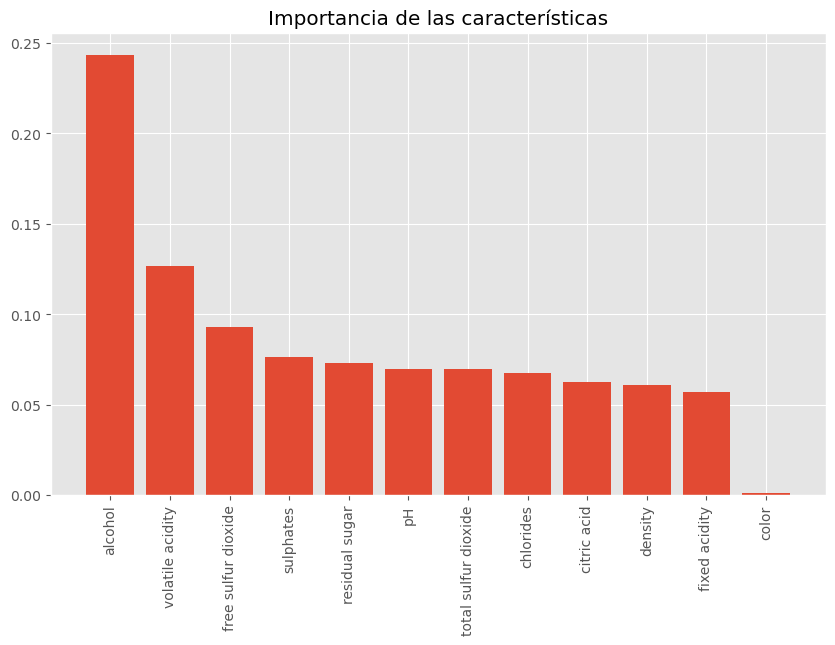

In [88]:
# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características")
plt.bar(range(x_train_esc.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train_esc.shape[1]), x_train_esc.columns[indices], rotation=90)
plt.xlim([-1, x_train_esc.shape[1]])
plt.show()

In [89]:
feature_names = x_train_esc.columns
feature_importance_df =pd.DataFrame({"Feature":feature_names,"Importance":importances})
feature_importance_df= feature_importance_df.sort_values(by="Importance",ascending=False)
print(feature_importance_df)

                 Feature  Importance
10               alcohol    0.243380
1       volatile acidity    0.126602
5    free sulfur dioxide    0.093004
9              sulphates    0.076358
3         residual sugar    0.072797
8                     pH    0.069741
6   total sulfur dioxide    0.069670
4              chlorides    0.067224
2            citric acid    0.062544
7                density    0.060699
0          fixed acidity    0.056753
11                 color    0.001228


In [91]:
# Seleccionar las características más importantes (top 6)
top_features = feature_importance_df["Feature"][:6].values
x_train_selected = x_train_esc[top_features]
x_test_selected = x_test_esc[top_features]

## 5. SEGUNDO MODELO: Random Forest Regressor con las variables seleccionadas

In [92]:
rf_selected= RFR(n_estimators=100,random_state=42)
rf_selected.fit(x_train_selected, y_train)

RandomForestRegressor(random_state=42)

In [93]:
accuracy_after= rf_selected.score(x_test_selected,y_test)
print(f'Accuracy after feature selection: {accuracy_after}')

Accuracy after feature selection: 0.5250173681060841


In [95]:
metricas(rf_selected,x_train_selected,y_train)

{'r2': 0.9279215909837067,
 'rmse': 0.23302158086399383,
 'mae': 0.16559168751202613}

In [96]:
metricas(rf_selected,x_test_selected,y_test)

{'r2': 0.5250173681060841,
 'rmse': 0.6160141731636225,
 'mae': 0.43402307692307684}

### Conclusiones primer y segundo modelo: Random Forest Regressor y Random Forest Regressor con seleccion de caracteristicas
**Random Forest Regressor sin selección de características**
- Rendimiento general: El modelo tiene un coeficiente de determinación (R^2) de aproximadamente 0.55 en el conjunto de datos de prueba, lo que indica que puede explicar alrededor del 55% de la variabilidad en la variable objetivo.
- Métricas de error: El RMSE (error cuadrático medio) en el conjunto de prueba es de aproximadamente 0.60, lo que sugiere que las predicciones del modelo tienen un error promedio de 0.60 en la escala de la variable objetivo.
- Importancia de las características: Según la importancia de las características obtenida del modelo, las características más importantes para predecir la variable objetivo son: alcohol, acidez volátil, dióxido de azufre libre, sulfatos, azúcar residual y pH.
- El modelo actual parece estar sobreajustando los datos de entrenamiento. El alto valor de (R^2) y los bajos valores de RMSE y MAE en el conjunto de entrenamiento, junto con la gran disminución de (R^2) y el aumento de los errores en el conjunto de prueba, sugieren que el modelo ha aprendido demasiado bien los datos de entrenamiento, incluidas las posibles características de ruido, y no generaliza bien a nuevos datos no vistos.

**Random Forest Regressor con selección de características**
- Rendimiento después de la selección de características: Después de seleccionar las 6 características más importantes según el modelo anterior, el coeficiente de determinación (R^2) en el conjunto de datos de prueba disminuye ligeramente a aproximadamente 0.53.Esto es completamente razonable ya que el valor de (R^2) dismuniye al disminuir el número de caracteristicas por lo que no es una métrica fiable en este caso. 
- Métricas de error después de la selección de características: El RMSE (error cuadrático medio) en el conjunto de prueba aumenta a aproximadamente 0.62 después de la selección de características, lo que indica un ligero empeoramiento en el rendimiento del modelo. Es Como mide el error cometido en las mismas unidades que la propia variable target, esta métrica si que es fiable para evaluar el rendimiento de nuestro modelo.

**Conclusiones finales:**
Ambos modelos muestran un buen rendimiento en la predicción de la variable objetivo, con un coeficiente de determinación (R^2) significativo y errores de predicción aceptables.
La selección de características puede mejorar la interpretabilidad del modelo y reducir la complejidad al utilizar solo las características más relevantes.
Sin embargo, la selección de características puede llevar a una ligera disminución en el rendimiento del modelo, como se observa en este caso.

## 6. TERCER Y CUARTO MODELO: Grid Search and Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [63]:
estimador=RFR()
parametros={"n_estimators":[20,50],
            "max_depth":[2,5,10]}
gs_rf=GridSearchCV(estimator=estimador,param_grid=parametros,n_jobs=-1,cv=5,verbose=2)
gs_rf.fit(x_train_esc,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'n_estimators': [20, 50]},
             verbose=2)

In [64]:
gs_rf.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=50)

In [76]:
metricas(gs_rf,x_train_esc,y_train)

{'r2': 0.7032426912892608,
 'rmse': 0.4728182815492034,
 'mae': 0.37147897599681573}

In [77]:
metricas(gs_rf,x_test_esc,y_test)

{'r2': 0.4792359936701358,
 'rmse': 0.6450187204339995,
 'mae': 0.49288656933336317}

### Afinamos hiperparámetros

In [79]:
parametros = {
    "n_estimators": [20, 50],
    "max_depth": [2, 5, 10],
    "min_samples_split": [2, 5, 10],  # Nuevos hiperparámetros
    "min_samples_leaf": [1, 2, 4],     # Nuevos hiperparámetros
    "max_features": ["auto", "sqrt", "log2"]}  # Nuevos hiperparámetros
gs_rf2 = GridSearchCV(estimator=estimador, param_grid=parametros, cv=10, n_jobs=-1, verbose=2)
gs_rf2.fit(x_train_esc,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


C:\Users\nalmo\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50]},
             verbose=2)

In [80]:
gs_rf2.best_estimator_

RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=50)

In [81]:
metricas(gs_rf2,x_train_esc,y_train)

{'r2': 0.6705623556538716,
 'rmse': 0.4981729705320407,
 'mae': 0.3811955255494032}

In [82]:
metricas(gs_rf2,x_test_esc,y_test)

{'r2': 0.47291314395078654,
 'rmse': 0.6489226497031014,
 'mae': 0.4915060483583333}

### Conclusiones tercer y cuarto modelo: Random Forest Regressor con Grid Search
Dado que las diferencias en las métricas de rendimiento son pequeñas y ambos modelos son relativamente similares en términos de R^2 y RMSE, podríamos concluir que ambos modelos tienen un rendimiento comparable en la predicción del conjunto de datos de prueba.

Si los comparamos con el primer modelo (Random Forest sin Grid Search):  

**Primer modelo sin GridSearchCV (sin selección de características):**  
- R^2 en conjunto de datos de prueba: 0.5489  
- RMSE en conjunto de datos de prueba: 0.6003  

**Tercer modelo: Modelo obtenido mediante GridSearchCV (con selección de características):**
- R^2 en conjunto de datos de prueba: 0.4792
- RMSE en conjunto de datos de prueba: 0.6450  

Observamos que los modelos obtenidos mediante GridSearchCV tienen un rendimiento ligeramente inferior en términos de R^2 y RMSE en comparación con los modelos sin GridSearchCV.

## 7. QUINTO MODELO: Decision Tree Regressor con Grid Search

In [97]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [98]:
estimador=DTR()
parametros={"max_depth":[5,10,20],
            "min_samples_split":[3,10]}

In [99]:
gs_arbol=GridSearchCV(estimator=estimador,param_grid=parametros,n_jobs=-1,cv=3,verbose=2)

In [101]:
gs_arbol.fit(x_train_esc,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [3, 10]},
             verbose=2)

In [103]:
metricas(gs_arbol,x_train_esc,y_train)

{'r2': 0.3489496994392428,
 'rmse': 0.7003269193289323,
 'mae': 0.5476403721245127}

In [105]:
metricas(gs_arbol,x_test_esc,y_test)

{'r2': 0.32123620054799495,
 'rmse': 0.7363955843299559,
 'mae': 0.5736701928925667}

## 8. SEXTO MODELO: Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
lr=LinearRegression(fit_intercept=True)

In [108]:
lr.fit(x_train_esc,y_train)

LinearRegression()

In [110]:
lr.predict(x_test_esc)

array([6.19217666, 6.42087521, 5.46737161, ..., 5.82250421, 5.80868866,
       6.11094824])

In [111]:
lr.score(x_test_esc,y_test)

0.32588084924847394

In [112]:
np.round(lr.coef_,3)

array([ 0.1  , -0.242, -0.017,  0.281, -0.025,  0.096, -0.088, -0.281,
        0.075,  0.104,  0.271, -0.323])

In [113]:
df_importancia = pd.DataFrame(np.round(lr.coef_,3),index=x_train_esc.columns)

In [114]:
df_importancia.sort_values(by=[0],ascending=False,inplace=True)

In [115]:
df_importancia

,0
residual sugar,0.281
alcohol,0.271
sulphates,0.104
fixed acidity,0.100
free sulfur dioxide,0.096
pH,0.075
citric acid,-0.017
chlorides,-0.025
total sulfur dioxide,-0.088
volatile acidity,-0.242


Según este modelo de Regresión Lineal, las características más importantes son:  
- residual sugar: 0.281
- density: -0.281
- alcohol: 0.271
- volatile acidity: -0.242
- color: -0.323  
(Aquellas con coeficientes más altos en términos de valor absoluto)

### Conclusiones quinto y sexto modelo: Decision Tree Regressor con Grid Search y Linear Regression
Las métricas obtenidas en estos últimos modelos son significativamente peores que las obtenidas en los modelos previos, por lo que descartamos la elección de estos últimos. 

## 9. CONCLUSIONES FINALES
En este análisis se han evaluado varios modelos de regresión para predecir la variable objetivo en el conjunto de datos proporcionado. Los modelos Random Forest Regressor, tanto sin selección de características como con selección de características, demostraron un rendimiento sólido con un R^2 significativo y errores de predicción aceptables. La selección de características mejoró la interpretabilidad del modelo a costa de una ligera disminución en el rendimiento. Sin embargo, los modelos ajustados mediante GridSearchCV no lograron mejorar el rendimiento significativamente y mostraron métricas de R^2 y RMSE ligeramente inferiores. Finalmente, los modelos Decision Tree Regressor con Grid Search y Linear Regression presentaron un desempeño notablemente inferior, por lo que fueron descartados. En resumen, aunque la optimización y la selección de características pueden influir en el rendimiento y la interpretabilidad del modelo, el Random Forest Regressor sin Grid Search y con selección de características emergió como la opción más equilibrada y eficaz para este conjunto de datos.  
Otro posible enfoque sería tratar este problema como un ejercicio de clasificación, dividiendo la variable objetivo "calidad" en tres categorías: mala, normal y excelente. Este enfoque podría proporcionar una perspectiva diferente y posiblemente más intuitiva para evaluar la calidad. Sin embargo, debido a limitaciones de tiempo, este enfoque no se ha implementado en el análisis actual.